<a href="https://colab.research.google.com/github/Roshni-seth/Machine-Learning/blob/main/FunctionTransformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle (3).json to kaggle (3).json


{'kaggle (3).json': b'{"username":"rosh05032001","key":"0684e1839ccedea0779e4cec79194e29"}'}

In [2]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [3]:
! kaggle datasets download brendan45774/test-file

Dataset URL: https://www.kaggle.com/datasets/brendan45774/test-file
License(s): CC0-1.0
  0% 0.00/11.2k [00:00<?, ?B/s]
100% 11.2k/11.2k [00:00<00:00, 24.0MB/s]


In [5]:
import pandas as pd
import numpy as np

import scipy.stats as stats  # for plotting QQ plot

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score  # for cross validation

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [7]:
df=pd.read_csv('/content/test-file.zip',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,34.5,7.8292
1,1,47.0,7.0000
2,0,62.0,9.6875
3,0,27.0,8.6625
4,1,22.0,12.2875


In [8]:
df.isnull().sum()

,0
Survived,0
Age,86
Fare,1


In [37]:

df['Age'].fillna(df['Age'].mean(),inplace=True)
df['Fare'].fillna(df['Fare'].median(),inplace=True)

<ipython-input-37-3cd608e77ac9>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(),inplace=True)
<ipython-input-37-3cd608e77ac9>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [22]:
df.isnull().sum()

,0
Survived,0
Age,0
Fare,0


In [38]:
X=df.iloc[:,1:3]
y=df.iloc[:,0]

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

<ipython-input-25-77919b760481>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'])


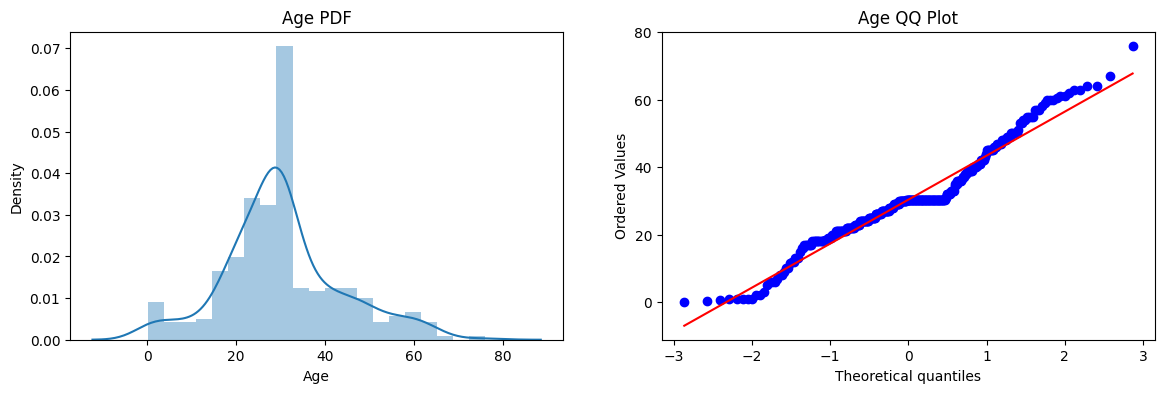

In [25]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'],dist='norm',plot=plt)
plt.title('Age QQ Plot')
plt.show()

<ipython-input-26-50347a472c80>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Fare'])


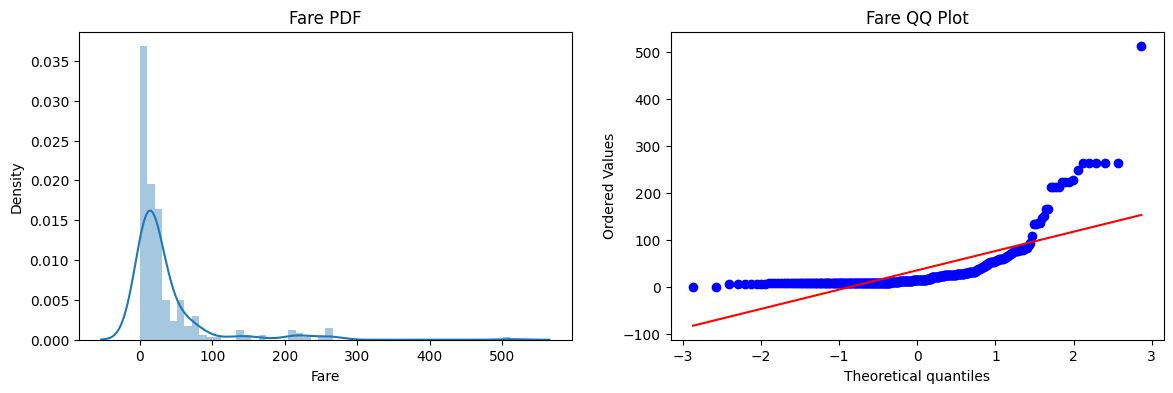

In [26]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(X_train['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'],dist='norm',plot=plt)
plt.title('Fare QQ Plot')
plt.show()

In [27]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

In [40]:
clf.fit(X_train,y_train)
clf2.fit(X_train,y_train)

y_pred=clf.predict(X_test)
y_pred2=clf2.predict(X_test)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.5952380952380952
Accuracy DT 0.5


In [33]:
trf=FunctionTransformer(func=np.log1p)  # np.log1p value me pehle 1 add krta so that koi value 0 na rhe


In [41]:
X_train_transformed=trf.fit_transform(X_train)
X_test_transformed=trf.fit_transform(X_test)

In [42]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed,y_train)
clf2.fit(X_train_transformed,y_train)

y_pred=clf.predict(X_test_transformed)
y_pred2=clf2.predict(X_test_transformed)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.5833333333333334
Accuracy DT 0.5119047619047619


In [43]:
X_transformed=trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10)))

LR 0.6556329849012775
DT 0.5861788617886179


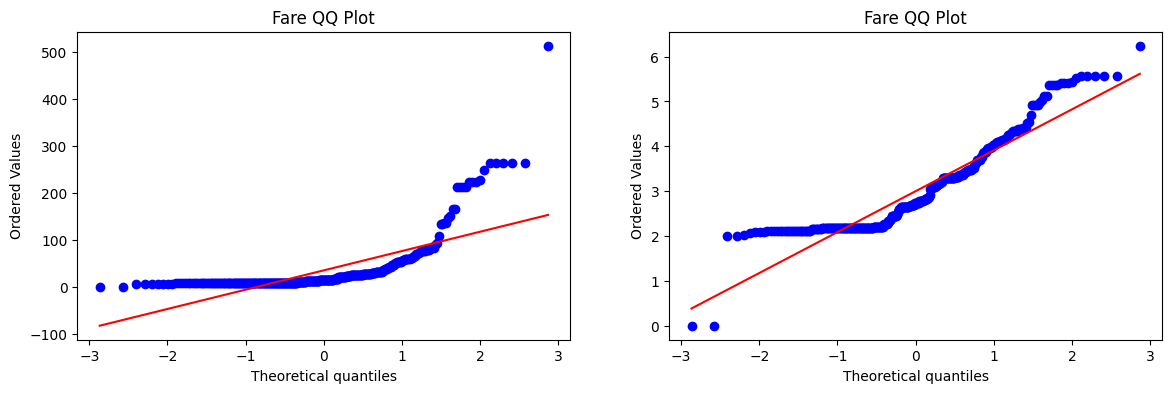

In [44]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'],dist="norm",plot=plt)
plt.title('Fare QQ Plot')

plt.show()

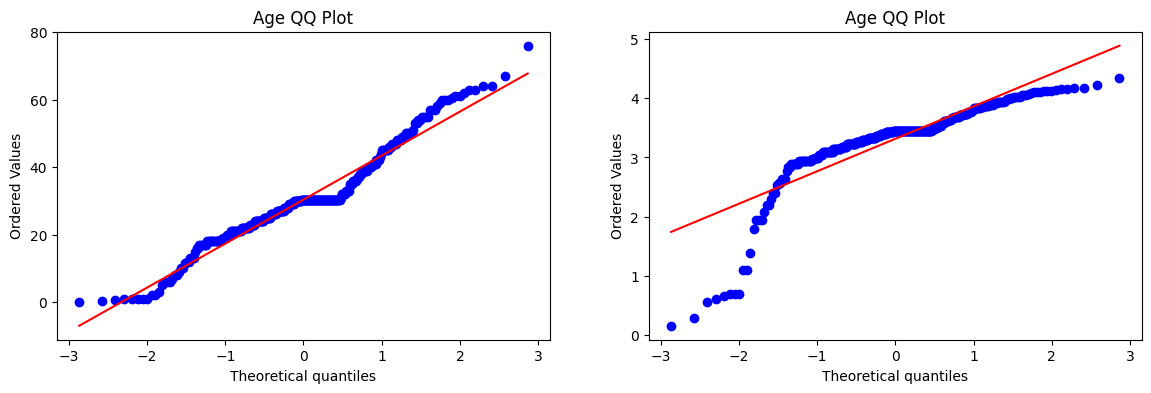

In [45]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(X_train['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'],dist="norm",plot=plt)
plt.title('Age QQ Plot')

plt.show()

In [47]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2=trf2.fit_transform(X_train)
X_test_transformed2=trf2.transform(X_test)

In [48]:
clf=LogisticRegression()
clf2=DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)

y_pred=clf.predict(X_test_transformed2)
y_pred2=clf2.predict(X_test_transformed2)

print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.5833333333333334
Accuracy DT 0.5119047619047619


In [49]:
X_transformed2=trf.fit_transform(X)

clf=LogisticRegression()
clf2=DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6556329849012775
DT 0.5980836236933798


In [50]:
def apply_transform(transform):
  X=df.iloc[:,1:3]
  y=df.iloc[:,0]

  trf=ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')

  X_trans = trf.fit_transform(X)

  clf=LogisticRegression()
  print("Accuracy", np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))

  plt.figure(figsize=(14,4))

  plt.subplot(121)
  stats.probplot(X['Fare'],dist="norm",plot=plt)
  plt.title('Fare Before Transform')

  plt.subplot(122)
  stats.probplot(X_trans[:,0],dist="norm",plot=plt)
  plt.title('Fare After Transform')

  plt.show()

Accuracy 0.6483739837398372


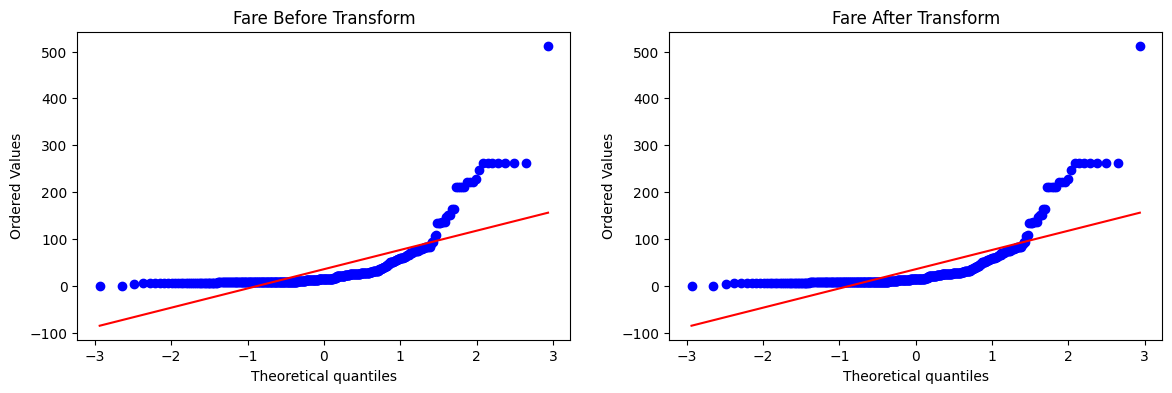

In [51]:
apply_transform(lambda x:x)

Accuracy 0.6506968641114981


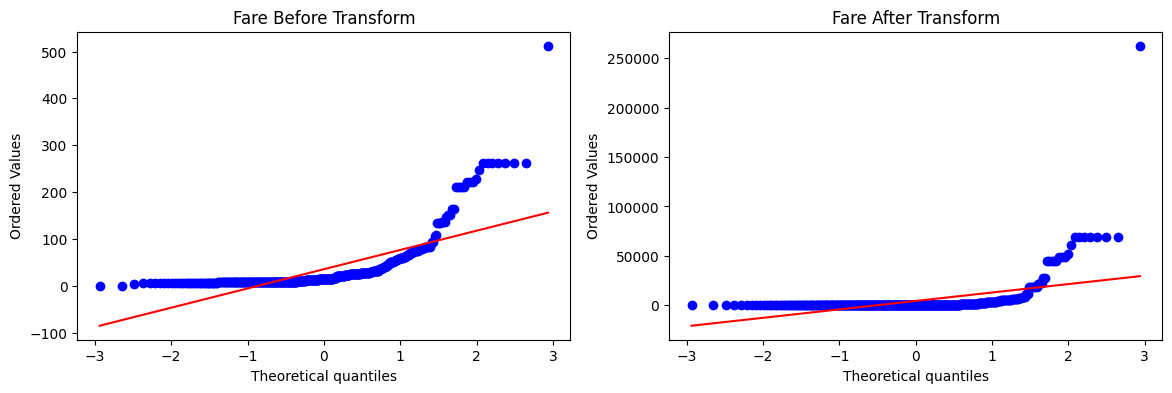

In [52]:
apply_transform(lambda x:x**2)